# Predicting Heart Disease using Machine Learning 

**Objective:** Given clinical parameters about a patient, build a predictive model that can predict whether a patient has heart disease or not.

### Data Source

* Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
* UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Data Dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides 
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-Learn ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Data

In [2]:
# Data
data_p = pd.read_csv('heart-disease.csv')

In [3]:
data_p.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

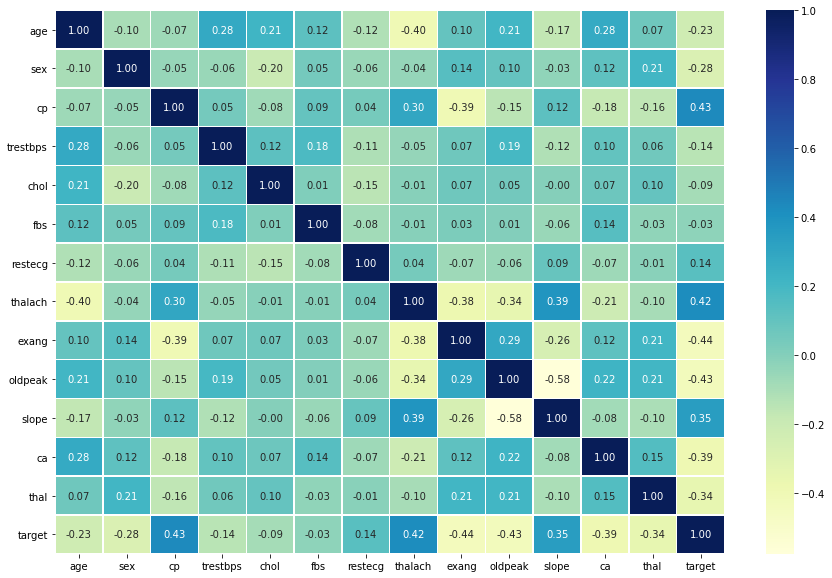

In [5]:
# Visualizing the correlation matrix
corr_matrix = data_p.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

In [6]:
type(data_p.corr())

pandas.core.frame.DataFrame

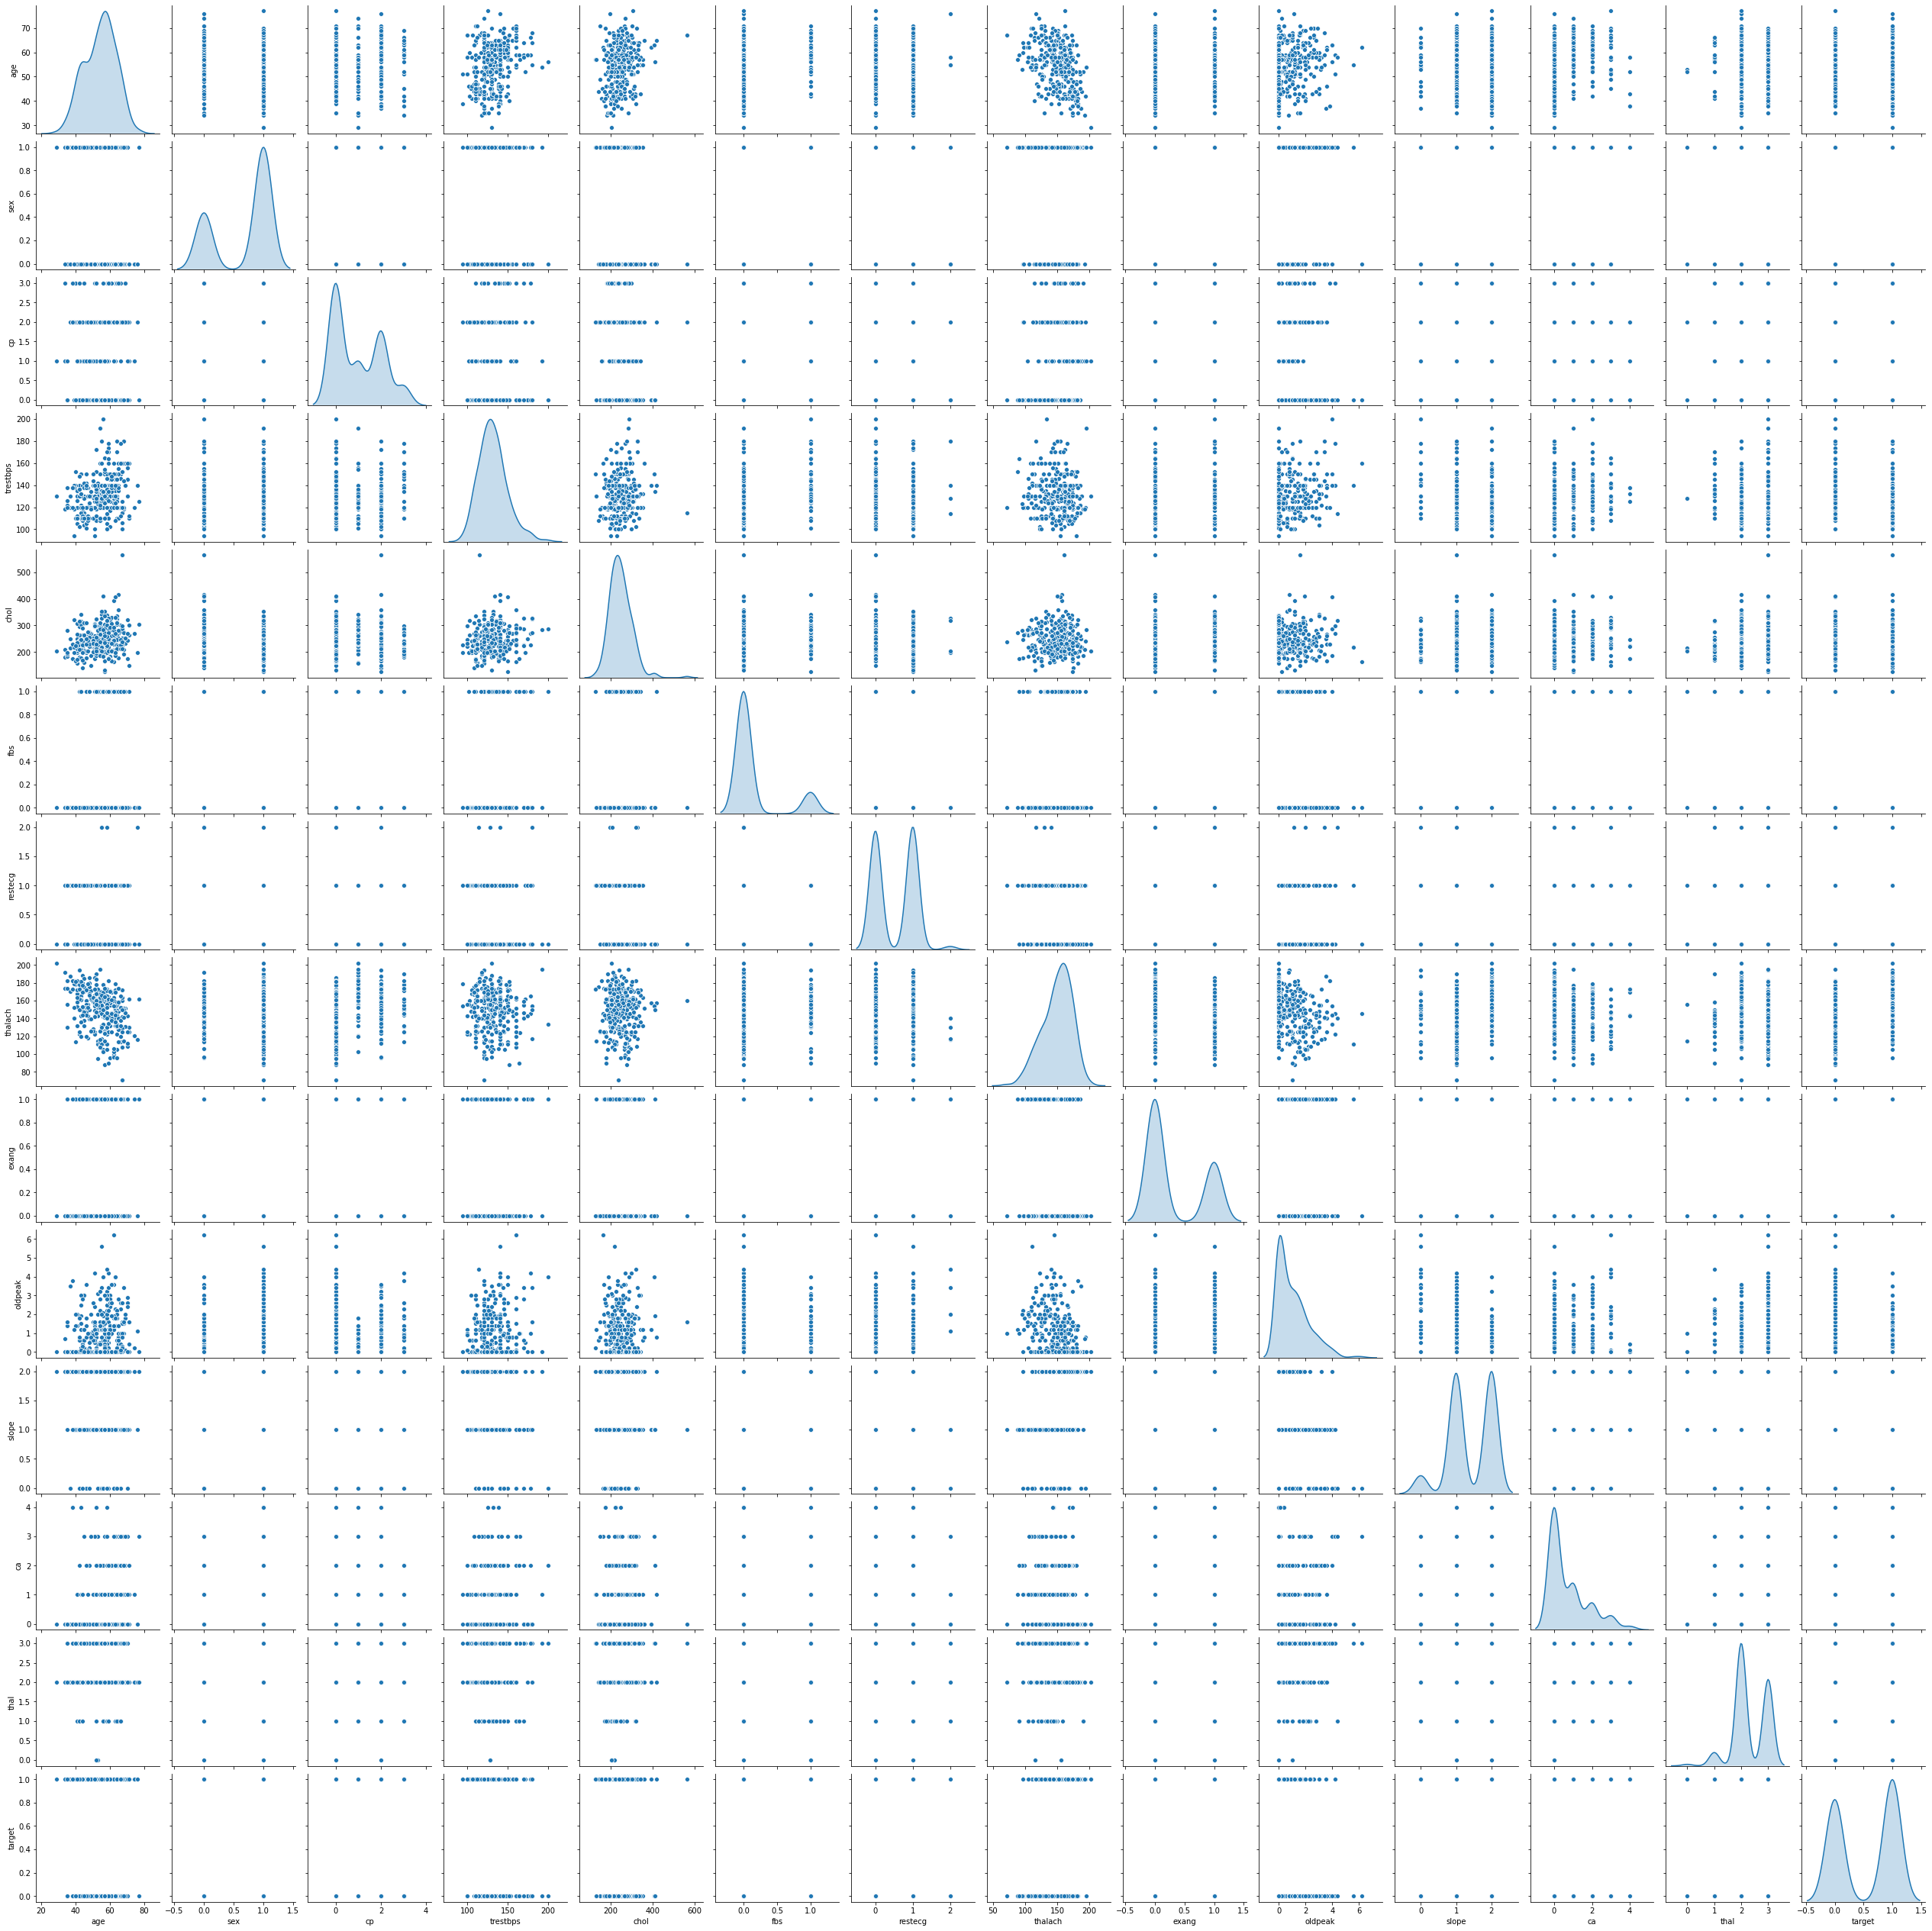

In [7]:
# Bivariate analysis
sns.pairplot(data_p, diag_kind='kde')

Number of Positive cases: 165. Percentage = 54.45544554455446
Number of Negative cases: 138. Percentage = 45.54455445544555


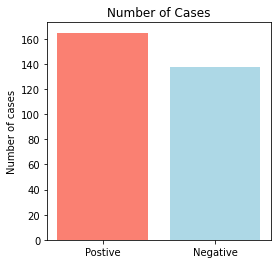

In [8]:
# Calculate heart disease ratio from true/false of outcome variable
n_true = len(data_p.loc[data_p['target'] == True])
n_false = len(data_p.loc[data_p['target'] == False ])
print("Number of Positive cases: {0}. Percentage = {1}".format(n_true, n_true/(n_true + n_false) * 100))
print("Number of Negative cases: {0}. Percentage = {1}".format(n_false, n_false/(n_true + n_false) * 100))

# Visualization
dic_1 = {"Postive": n_true, "Negative": n_false}
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(dic_1.keys(), dic_1.values(), width=0.8, color=['salmon', 'lightblue'])
ax.set(title="Number of Cases",
       ylabel="Number of cases");

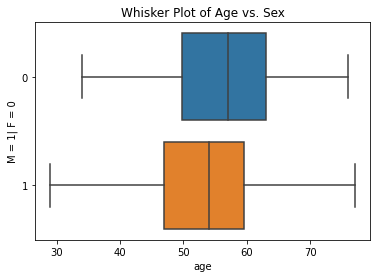

In [9]:
# Creating a box plot
ax = sns.boxplot(x='age', y='sex', data=data_p, orient="h");
ax.set(title='Whisker Plot of Age vs. Sex',
       ylabel="M = 1| F = 0");

 This whisker plot indicates the different quartiles of our dataset for each sex. The mean age for females in our dataset is higher than that of males. Any female subjects below the age of thirty isn't in our sample. On the other hand, male subjects cover a more vast range than female subjects

In [10]:
# Ratio of male and female postive & negative cases
pd.crosstab(data_p['sex'], data_p['target'])

target,0,1
sex,,
0,24,72
1,114,93


## Modelling

In [11]:
# Find the categorical variables
categorical_variables = []

for column in data_p:
    if len(data_p[column].unique()) <= 10:
        categorical_variables.append(column)

# Remove the target variable
categorical_variables.remove('target')

print(categorical_variables)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [12]:
# Make dummy variables for categorical variables
data = pd.get_dummies(data_p, columns=categorical_variables)

In [13]:
# Split the data
X = data.drop('target', axis=1)
y = data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
# Non-scaled data
X_train_ws = X_train
X_test_ws = X_test

In [16]:
# Scaled data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
# Models to use
models = {"Logistic Regression": LogisticRegression(random_state=7, solver='liblinear'),
          "Random Forest": RandomForestClassifier(random_state=7),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "SVM Kernel": SVC(kernel="rbf", random_state=7),
          "Naive Bayes": GaussianNB()}

# Function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    1. models: arguments excepts machine learning models
    2. X_train, X_test, y_train, y_test: arguement takes the splitted data
    """
    np.random.seed(7)
    
    # Model scores within the dictionary
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
# Model accuracies with scaling
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

{'Logistic Regression': 0.7704918032786885,
 'Random Forest': 0.7540983606557377,
 'K-Nearest Neighbors': 0.8032786885245902,
 'SVM Kernel': 0.7540983606557377,
 'Naive Bayes': 0.5081967213114754}

In [19]:
# Model accuracies without scaling
model_scores_ws = fit_score(models=models,
                       X_train=X_train_ws,
                       X_test=X_test_ws,
                       y_train=y_train,
                       y_test=y_test)
model_scores_ws

{'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.8032786885245902,
 'K-Nearest Neighbors': 0.5573770491803278,
 'SVM Kernel': 0.6229508196721312,
 'Naive Bayes': 0.8032786885245902}

## Model Comparision 

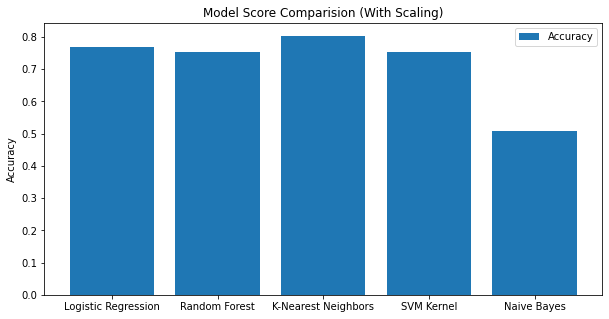

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(model_scores.keys(), model_scores.values())
ax.legend(['Accuracy'])
ax.set(ylabel="Accuracy",
       title='Model Score Comparision (With Scaling)');

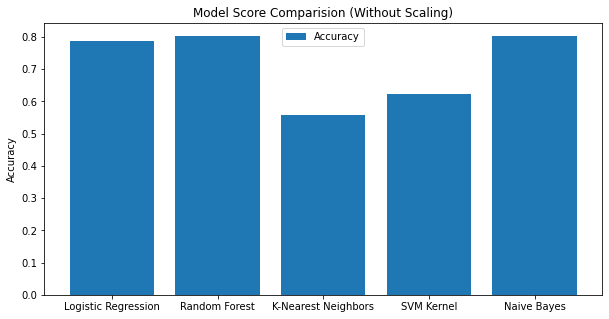

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(model_scores_ws.keys(), model_scores_ws.values())
ax.legend(['Accuracy'])
ax.set(ylabel="Accuracy",
       title='Model Score Comparision (Without Scaling)');

#### Model performance on scaled data vs non-scaled data:
* KNN Model had a drastic change in accuracy score with scaling. 
> **Conclusion:** Euclidean distance based models require standardisation on data.

* Random Forest and Naive Bayes model performed better without scaling. 
> **Conculsion:** Random Forest and Naive Bayes (Gaussian Naive Bayes performs standardization internally) don't require standardisation on data.

* Logistic Regression performed slightly better without scaling

* SVM scored better with scaling. 
> **Conclusion:** Yes, SVM kernel `(Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training.)` performs better with standardisation on data.

Other resource(s):
https://www.youtube.com/watch?v=mnKm3YP56PY

### EXTRA MODEL: CatBoost

In [22]:
# Install catboost
# import sys
# !conda config --add channels conda-forge
# !conda install --yes --prefix {sys.prefix} catboost

In [23]:
# Visualize confusion matrix
def plot_conf_matrix(con_mat):
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(con_mat,
                     annot=True,
                     cbar=False,)
    ax.set(xlabel="True label",
           ylabel='Predicted label')

In [24]:
# Apply Min-Max scaling For CatBoost
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train_ws ,y=None)
X_test_mms = mms.fit_transform(X_test_ws ,y=None)

In [25]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train_mms, y_train)

Learning rate set to 0.005621
0:	learn: 0.6879166	total: 242ms	remaining: 4m 1s
1:	learn: 0.6834096	total: 244ms	remaining: 2m 1s
2:	learn: 0.6793480	total: 247ms	remaining: 1m 22s
3:	learn: 0.6743622	total: 250ms	remaining: 1m 2s
4:	learn: 0.6700756	total: 253ms	remaining: 50.4s
5:	learn: 0.6650618	total: 256ms	remaining: 42.5s
6:	learn: 0.6603487	total: 259ms	remaining: 36.8s
7:	learn: 0.6552348	total: 263ms	remaining: 32.6s
8:	learn: 0.6511062	total: 266ms	remaining: 29.2s
9:	learn: 0.6469946	total: 269ms	remaining: 26.6s
10:	learn: 0.6432289	total: 272ms	remaining: 24.4s
11:	learn: 0.6394214	total: 275ms	remaining: 22.6s
12:	learn: 0.6352253	total: 278ms	remaining: 21.1s
13:	learn: 0.6312065	total: 281ms	remaining: 19.8s
14:	learn: 0.6290873	total: 283ms	remaining: 18.6s
15:	learn: 0.6247123	total: 286ms	remaining: 17.6s
16:	learn: 0.6217299	total: 289ms	remaining: 16.7s
17:	learn: 0.6170693	total: 292ms	remaining: 15.9s
18:	learn: 0.6129209	total: 295ms	remaining: 15.2s
19:	learn:

162:	learn: 0.3151778	total: 758ms	remaining: 3.89s
163:	learn: 0.3140340	total: 762ms	remaining: 3.88s
164:	learn: 0.3129466	total: 765ms	remaining: 3.87s
165:	learn: 0.3120727	total: 770ms	remaining: 3.87s
166:	learn: 0.3111761	total: 773ms	remaining: 3.86s
167:	learn: 0.3100998	total: 776ms	remaining: 3.85s
168:	learn: 0.3088959	total: 779ms	remaining: 3.83s
169:	learn: 0.3081549	total: 781ms	remaining: 3.81s
170:	learn: 0.3071010	total: 785ms	remaining: 3.81s
171:	learn: 0.3063266	total: 788ms	remaining: 3.79s
172:	learn: 0.3053577	total: 791ms	remaining: 3.78s
173:	learn: 0.3045579	total: 794ms	remaining: 3.77s
174:	learn: 0.3035663	total: 797ms	remaining: 3.76s
175:	learn: 0.3027937	total: 801ms	remaining: 3.75s
176:	learn: 0.3018191	total: 804ms	remaining: 3.74s
177:	learn: 0.3006398	total: 808ms	remaining: 3.73s
178:	learn: 0.2996448	total: 811ms	remaining: 3.72s
179:	learn: 0.2987893	total: 814ms	remaining: 3.71s
180:	learn: 0.2978519	total: 817ms	remaining: 3.7s
181:	learn: 0

323:	learn: 0.2098209	total: 1.27s	remaining: 2.66s
324:	learn: 0.2093707	total: 1.28s	remaining: 2.65s
325:	learn: 0.2089040	total: 1.28s	remaining: 2.65s
326:	learn: 0.2084730	total: 1.28s	remaining: 2.65s
327:	learn: 0.2080184	total: 1.29s	remaining: 2.64s
328:	learn: 0.2074678	total: 1.29s	remaining: 2.64s
329:	learn: 0.2071342	total: 1.29s	remaining: 2.63s
330:	learn: 0.2068372	total: 1.3s	remaining: 2.63s
331:	learn: 0.2062540	total: 1.3s	remaining: 2.62s
332:	learn: 0.2058625	total: 1.31s	remaining: 2.62s
333:	learn: 0.2055054	total: 1.31s	remaining: 2.61s
334:	learn: 0.2049913	total: 1.31s	remaining: 2.61s
335:	learn: 0.2043847	total: 1.32s	remaining: 2.6s
336:	learn: 0.2039177	total: 1.32s	remaining: 2.6s
337:	learn: 0.2034815	total: 1.32s	remaining: 2.59s
338:	learn: 0.2030880	total: 1.33s	remaining: 2.59s
339:	learn: 0.2026814	total: 1.33s	remaining: 2.58s
340:	learn: 0.2020770	total: 1.33s	remaining: 2.58s
341:	learn: 0.2014473	total: 1.34s	remaining: 2.58s
342:	learn: 0.20

502:	learn: 0.1507378	total: 1.92s	remaining: 1.89s
503:	learn: 0.1504197	total: 1.92s	remaining: 1.89s
504:	learn: 0.1501763	total: 1.92s	remaining: 1.89s
505:	learn: 0.1498953	total: 1.93s	remaining: 1.88s
506:	learn: 0.1497452	total: 1.93s	remaining: 1.88s
507:	learn: 0.1493323	total: 1.94s	remaining: 1.87s
508:	learn: 0.1491071	total: 1.94s	remaining: 1.87s
509:	learn: 0.1487874	total: 1.94s	remaining: 1.86s
510:	learn: 0.1485281	total: 1.95s	remaining: 1.86s
511:	learn: 0.1483195	total: 1.95s	remaining: 1.86s
512:	learn: 0.1481337	total: 1.95s	remaining: 1.85s
513:	learn: 0.1478597	total: 1.96s	remaining: 1.85s
514:	learn: 0.1476919	total: 1.96s	remaining: 1.84s
515:	learn: 0.1474542	total: 1.96s	remaining: 1.84s
516:	learn: 0.1472744	total: 1.96s	remaining: 1.83s
517:	learn: 0.1469841	total: 1.97s	remaining: 1.83s
518:	learn: 0.1467843	total: 1.97s	remaining: 1.83s
519:	learn: 0.1464856	total: 1.97s	remaining: 1.82s
520:	learn: 0.1462488	total: 1.98s	remaining: 1.82s
521:	learn: 

710:	learn: 0.1102882	total: 2.6s	remaining: 1.06s
711:	learn: 0.1101282	total: 2.6s	remaining: 1.05s
712:	learn: 0.1099370	total: 2.61s	remaining: 1.05s
713:	learn: 0.1097587	total: 2.61s	remaining: 1.05s
714:	learn: 0.1096780	total: 2.62s	remaining: 1.04s
715:	learn: 0.1095890	total: 2.62s	remaining: 1.04s
716:	learn: 0.1094380	total: 2.62s	remaining: 1.03s
717:	learn: 0.1093184	total: 2.63s	remaining: 1.03s
718:	learn: 0.1092683	total: 2.63s	remaining: 1.03s
719:	learn: 0.1091664	total: 2.63s	remaining: 1.02s
720:	learn: 0.1089164	total: 2.63s	remaining: 1.02s
721:	learn: 0.1087254	total: 2.64s	remaining: 1.02s
722:	learn: 0.1086131	total: 2.64s	remaining: 1.01s
723:	learn: 0.1084214	total: 2.65s	remaining: 1.01s
724:	learn: 0.1082865	total: 2.65s	remaining: 1s
725:	learn: 0.1082012	total: 2.65s	remaining: 1s
726:	learn: 0.1080923	total: 2.65s	remaining: 997ms
727:	learn: 0.1080150	total: 2.66s	remaining: 993ms
728:	learn: 0.1078428	total: 2.66s	remaining: 990ms
729:	learn: 0.107693

897:	learn: 0.0855445	total: 3.24s	remaining: 368ms
898:	learn: 0.0854277	total: 3.24s	remaining: 364ms
899:	learn: 0.0853488	total: 3.24s	remaining: 360ms
900:	learn: 0.0852506	total: 3.25s	remaining: 357ms
901:	learn: 0.0850815	total: 3.25s	remaining: 353ms
902:	learn: 0.0849824	total: 3.25s	remaining: 350ms
903:	learn: 0.0848704	total: 3.26s	remaining: 346ms
904:	learn: 0.0847217	total: 3.26s	remaining: 342ms
905:	learn: 0.0846325	total: 3.26s	remaining: 339ms
906:	learn: 0.0845360	total: 3.27s	remaining: 335ms
907:	learn: 0.0844764	total: 3.27s	remaining: 331ms
908:	learn: 0.0843582	total: 3.27s	remaining: 328ms
909:	learn: 0.0842236	total: 3.28s	remaining: 324ms
910:	learn: 0.0840642	total: 3.28s	remaining: 321ms
911:	learn: 0.0839125	total: 3.28s	remaining: 317ms
912:	learn: 0.0837512	total: 3.29s	remaining: 313ms
913:	learn: 0.0836268	total: 3.29s	remaining: 310ms
914:	learn: 0.0835697	total: 3.29s	remaining: 306ms
915:	learn: 0.0834394	total: 3.3s	remaining: 302ms
916:	learn: 0

In [26]:
y_preds_cb = cb_clf.predict(X_test_mms)

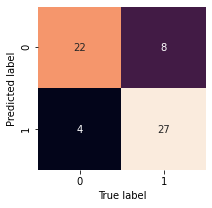

In [27]:
cat_conf_mat = confusion_matrix(y_test, y_preds_cb)
plot_conf_matrix(cat_conf_mat)

In [28]:
cb_clf.score(X_train_mms, y_train)

1.0

In [29]:
cb_clf.score(X_test_mms, y_test)

0.8032786885245902

In [30]:
# Cross validation
cb_clf_cv = cross_val_score(cb_clf,
                           X,
                           y,
                           cv=5,
                           scoring='accuracy')

Learning rate set to 0.005621
0:	learn: 0.6892907	total: 3.05ms	remaining: 3.05s
1:	learn: 0.6846106	total: 6.19ms	remaining: 3.09s
2:	learn: 0.6811809	total: 9.3ms	remaining: 3.09s
3:	learn: 0.6769382	total: 12.4ms	remaining: 3.1s
4:	learn: 0.6727664	total: 15.5ms	remaining: 3.09s
5:	learn: 0.6682351	total: 18.6ms	remaining: 3.08s
6:	learn: 0.6637002	total: 21.7ms	remaining: 3.08s
7:	learn: 0.6597925	total: 24.7ms	remaining: 3.07s
8:	learn: 0.6557712	total: 27.9ms	remaining: 3.08s
9:	learn: 0.6523532	total: 31.1ms	remaining: 3.08s
10:	learn: 0.6478592	total: 34.2ms	remaining: 3.07s
11:	learn: 0.6447546	total: 37.2ms	remaining: 3.06s
12:	learn: 0.6406941	total: 40.3ms	remaining: 3.06s
13:	learn: 0.6364629	total: 43.4ms	remaining: 3.05s
14:	learn: 0.6333780	total: 46.5ms	remaining: 3.06s
15:	learn: 0.6293204	total: 49.7ms	remaining: 3.06s
16:	learn: 0.6251129	total: 52.7ms	remaining: 3.05s
17:	learn: 0.6207785	total: 55.8ms	remaining: 3.04s
18:	learn: 0.6174250	total: 58.9ms	remaining: 

162:	learn: 0.3446356	total: 505ms	remaining: 2.59s
163:	learn: 0.3437284	total: 508ms	remaining: 2.59s
164:	learn: 0.3425697	total: 511ms	remaining: 2.58s
165:	learn: 0.3417586	total: 514ms	remaining: 2.58s
166:	learn: 0.3403210	total: 517ms	remaining: 2.58s
167:	learn: 0.3395952	total: 521ms	remaining: 2.58s
168:	learn: 0.3384215	total: 524ms	remaining: 2.58s
169:	learn: 0.3375365	total: 528ms	remaining: 2.58s
170:	learn: 0.3366069	total: 531ms	remaining: 2.57s
171:	learn: 0.3358073	total: 535ms	remaining: 2.58s
172:	learn: 0.3348281	total: 538ms	remaining: 2.57s
173:	learn: 0.3342333	total: 541ms	remaining: 2.57s
174:	learn: 0.3329775	total: 545ms	remaining: 2.57s
175:	learn: 0.3319825	total: 548ms	remaining: 2.56s
176:	learn: 0.3308571	total: 551ms	remaining: 2.56s
177:	learn: 0.3301993	total: 554ms	remaining: 2.56s
178:	learn: 0.3293044	total: 557ms	remaining: 2.55s
179:	learn: 0.3280786	total: 560ms	remaining: 2.55s
180:	learn: 0.3270295	total: 563ms	remaining: 2.55s
181:	learn: 

370:	learn: 0.2148577	total: 1.17s	remaining: 1.99s
371:	learn: 0.2143017	total: 1.18s	remaining: 1.98s
372:	learn: 0.2139586	total: 1.18s	remaining: 1.98s
373:	learn: 0.2135349	total: 1.18s	remaining: 1.98s
374:	learn: 0.2132793	total: 1.19s	remaining: 1.98s
375:	learn: 0.2130571	total: 1.19s	remaining: 1.97s
376:	learn: 0.2126827	total: 1.19s	remaining: 1.97s
377:	learn: 0.2122912	total: 1.2s	remaining: 1.97s
378:	learn: 0.2119192	total: 1.2s	remaining: 1.97s
379:	learn: 0.2116639	total: 1.2s	remaining: 1.96s
380:	learn: 0.2111438	total: 1.21s	remaining: 1.96s
381:	learn: 0.2108109	total: 1.21s	remaining: 1.96s
382:	learn: 0.2105913	total: 1.21s	remaining: 1.96s
383:	learn: 0.2100852	total: 1.22s	remaining: 1.95s
384:	learn: 0.2097749	total: 1.22s	remaining: 1.95s
385:	learn: 0.2092454	total: 1.22s	remaining: 1.95s
386:	learn: 0.2088915	total: 1.23s	remaining: 1.94s
387:	learn: 0.2083609	total: 1.23s	remaining: 1.94s
388:	learn: 0.2081154	total: 1.23s	remaining: 1.94s
389:	learn: 0.2

533:	learn: 0.1652630	total: 1.69s	remaining: 1.48s
534:	learn: 0.1650761	total: 1.69s	remaining: 1.47s
535:	learn: 0.1647730	total: 1.7s	remaining: 1.47s
536:	learn: 0.1644221	total: 1.7s	remaining: 1.47s
537:	learn: 0.1640430	total: 1.7s	remaining: 1.46s
538:	learn: 0.1636539	total: 1.71s	remaining: 1.46s
539:	learn: 0.1634222	total: 1.71s	remaining: 1.46s
540:	learn: 0.1631731	total: 1.72s	remaining: 1.46s
541:	learn: 0.1629018	total: 1.72s	remaining: 1.45s
542:	learn: 0.1625715	total: 1.72s	remaining: 1.45s
543:	learn: 0.1622790	total: 1.72s	remaining: 1.45s
544:	learn: 0.1619105	total: 1.73s	remaining: 1.44s
545:	learn: 0.1617317	total: 1.73s	remaining: 1.44s
546:	learn: 0.1615291	total: 1.73s	remaining: 1.44s
547:	learn: 0.1613898	total: 1.74s	remaining: 1.43s
548:	learn: 0.1610151	total: 1.74s	remaining: 1.43s
549:	learn: 0.1608502	total: 1.74s	remaining: 1.43s
550:	learn: 0.1604648	total: 1.75s	remaining: 1.42s
551:	learn: 0.1601671	total: 1.75s	remaining: 1.42s
552:	learn: 0.1

697:	learn: 0.1298903	total: 2.21s	remaining: 956ms
698:	learn: 0.1296636	total: 2.21s	remaining: 953ms
699:	learn: 0.1293984	total: 2.22s	remaining: 950ms
700:	learn: 0.1292662	total: 2.22s	remaining: 947ms
701:	learn: 0.1291023	total: 2.22s	remaining: 944ms
702:	learn: 0.1289890	total: 2.23s	remaining: 941ms
703:	learn: 0.1288736	total: 2.23s	remaining: 938ms
704:	learn: 0.1287902	total: 2.23s	remaining: 935ms
705:	learn: 0.1286181	total: 2.24s	remaining: 932ms
706:	learn: 0.1285200	total: 2.24s	remaining: 929ms
707:	learn: 0.1283347	total: 2.24s	remaining: 925ms
708:	learn: 0.1281830	total: 2.25s	remaining: 922ms
709:	learn: 0.1279464	total: 2.25s	remaining: 919ms
710:	learn: 0.1277768	total: 2.25s	remaining: 916ms
711:	learn: 0.1277260	total: 2.25s	remaining: 912ms
712:	learn: 0.1276678	total: 2.26s	remaining: 909ms
713:	learn: 0.1276209	total: 2.26s	remaining: 905ms
714:	learn: 0.1273647	total: 2.26s	remaining: 902ms
715:	learn: 0.1272800	total: 2.27s	remaining: 899ms
716:	learn: 

908:	learn: 0.0983429	total: 2.89s	remaining: 290ms
909:	learn: 0.0982041	total: 2.9s	remaining: 286ms
910:	learn: 0.0981060	total: 2.9s	remaining: 283ms
911:	learn: 0.0980583	total: 2.9s	remaining: 280ms
912:	learn: 0.0979360	total: 2.9s	remaining: 277ms
913:	learn: 0.0978942	total: 2.91s	remaining: 274ms
914:	learn: 0.0977742	total: 2.91s	remaining: 271ms
915:	learn: 0.0977053	total: 2.92s	remaining: 267ms
916:	learn: 0.0975670	total: 2.92s	remaining: 264ms
917:	learn: 0.0974468	total: 2.92s	remaining: 261ms
918:	learn: 0.0973494	total: 2.92s	remaining: 258ms
919:	learn: 0.0971644	total: 2.93s	remaining: 255ms
920:	learn: 0.0970104	total: 2.93s	remaining: 252ms
921:	learn: 0.0969295	total: 2.94s	remaining: 248ms
922:	learn: 0.0967526	total: 2.94s	remaining: 245ms
923:	learn: 0.0966107	total: 2.94s	remaining: 242ms
924:	learn: 0.0964833	total: 2.94s	remaining: 239ms
925:	learn: 0.0962959	total: 2.95s	remaining: 236ms
926:	learn: 0.0961345	total: 2.95s	remaining: 232ms
927:	learn: 0.09

113:	learn: 0.4137732	total: 348ms	remaining: 2.7s
114:	learn: 0.4121004	total: 351ms	remaining: 2.7s
115:	learn: 0.4105416	total: 354ms	remaining: 2.7s
116:	learn: 0.4093809	total: 358ms	remaining: 2.7s
117:	learn: 0.4075754	total: 361ms	remaining: 2.7s
118:	learn: 0.4059688	total: 364ms	remaining: 2.7s
119:	learn: 0.4048808	total: 368ms	remaining: 2.7s
120:	learn: 0.4032867	total: 371ms	remaining: 2.7s
121:	learn: 0.4015821	total: 375ms	remaining: 2.7s
122:	learn: 0.4002033	total: 378ms	remaining: 2.69s
123:	learn: 0.3989921	total: 381ms	remaining: 2.69s
124:	learn: 0.3976622	total: 384ms	remaining: 2.69s
125:	learn: 0.3965551	total: 387ms	remaining: 2.69s
126:	learn: 0.3954551	total: 390ms	remaining: 2.68s
127:	learn: 0.3939005	total: 393ms	remaining: 2.68s
128:	learn: 0.3923014	total: 396ms	remaining: 2.67s
129:	learn: 0.3906740	total: 399ms	remaining: 2.67s
130:	learn: 0.3900918	total: 401ms	remaining: 2.66s
131:	learn: 0.3890559	total: 404ms	remaining: 2.65s
132:	learn: 0.3881202

280:	learn: 0.2697003	total: 865ms	remaining: 2.21s
281:	learn: 0.2690926	total: 868ms	remaining: 2.21s
282:	learn: 0.2687165	total: 872ms	remaining: 2.21s
283:	learn: 0.2683825	total: 875ms	remaining: 2.2s
284:	learn: 0.2677729	total: 878ms	remaining: 2.2s
285:	learn: 0.2675778	total: 880ms	remaining: 2.2s
286:	learn: 0.2669431	total: 884ms	remaining: 2.19s
287:	learn: 0.2663967	total: 887ms	remaining: 2.19s
288:	learn: 0.2658949	total: 890ms	remaining: 2.19s
289:	learn: 0.2655233	total: 894ms	remaining: 2.19s
290:	learn: 0.2651224	total: 897ms	remaining: 2.19s
291:	learn: 0.2643864	total: 900ms	remaining: 2.18s
292:	learn: 0.2637454	total: 903ms	remaining: 2.18s
293:	learn: 0.2632937	total: 907ms	remaining: 2.18s
294:	learn: 0.2627490	total: 910ms	remaining: 2.17s
295:	learn: 0.2623010	total: 913ms	remaining: 2.17s
296:	learn: 0.2618926	total: 916ms	remaining: 2.17s
297:	learn: 0.2612405	total: 919ms	remaining: 2.16s
298:	learn: 0.2606654	total: 922ms	remaining: 2.16s
299:	learn: 0.2

443:	learn: 0.2039664	total: 1.38s	remaining: 1.72s
444:	learn: 0.2035940	total: 1.38s	remaining: 1.72s
445:	learn: 0.2030914	total: 1.38s	remaining: 1.72s
446:	learn: 0.2025581	total: 1.39s	remaining: 1.72s
447:	learn: 0.2021349	total: 1.39s	remaining: 1.71s
448:	learn: 0.2019793	total: 1.4s	remaining: 1.71s
449:	learn: 0.2017122	total: 1.4s	remaining: 1.71s
450:	learn: 0.2012329	total: 1.4s	remaining: 1.71s
451:	learn: 0.2008701	total: 1.41s	remaining: 1.7s
452:	learn: 0.2006581	total: 1.41s	remaining: 1.7s
453:	learn: 0.2004028	total: 1.41s	remaining: 1.7s
454:	learn: 0.2000925	total: 1.42s	remaining: 1.7s
455:	learn: 0.1996628	total: 1.42s	remaining: 1.69s
456:	learn: 0.1994228	total: 1.42s	remaining: 1.69s
457:	learn: 0.1992868	total: 1.43s	remaining: 1.69s
458:	learn: 0.1987454	total: 1.43s	remaining: 1.68s
459:	learn: 0.1986083	total: 1.43s	remaining: 1.68s
460:	learn: 0.1982429	total: 1.44s	remaining: 1.68s
461:	learn: 0.1979137	total: 1.44s	remaining: 1.68s
462:	learn: 0.19738

606:	learn: 0.1615631	total: 1.9s	remaining: 1.23s
607:	learn: 0.1612843	total: 1.9s	remaining: 1.23s
608:	learn: 0.1611958	total: 1.9s	remaining: 1.22s
609:	learn: 0.1608842	total: 1.91s	remaining: 1.22s
610:	learn: 0.1607977	total: 1.91s	remaining: 1.22s
611:	learn: 0.1605383	total: 1.91s	remaining: 1.21s
612:	learn: 0.1603361	total: 1.92s	remaining: 1.21s
613:	learn: 0.1600336	total: 1.92s	remaining: 1.21s
614:	learn: 0.1597910	total: 1.92s	remaining: 1.2s
615:	learn: 0.1594422	total: 1.93s	remaining: 1.2s
616:	learn: 0.1592778	total: 1.93s	remaining: 1.2s
617:	learn: 0.1590768	total: 1.93s	remaining: 1.19s
618:	learn: 0.1588845	total: 1.94s	remaining: 1.19s
619:	learn: 0.1587030	total: 1.94s	remaining: 1.19s
620:	learn: 0.1585638	total: 1.94s	remaining: 1.19s
621:	learn: 0.1582296	total: 1.95s	remaining: 1.18s
622:	learn: 0.1580453	total: 1.95s	remaining: 1.18s
623:	learn: 0.1577186	total: 1.95s	remaining: 1.18s
624:	learn: 0.1575734	total: 1.95s	remaining: 1.17s
625:	learn: 0.1573

768:	learn: 0.1315654	total: 2.42s	remaining: 726ms
769:	learn: 0.1315017	total: 2.42s	remaining: 723ms
770:	learn: 0.1312289	total: 2.42s	remaining: 719ms
771:	learn: 0.1310056	total: 2.42s	remaining: 716ms
772:	learn: 0.1307823	total: 2.43s	remaining: 713ms
773:	learn: 0.1306512	total: 2.43s	remaining: 710ms
774:	learn: 0.1303879	total: 2.44s	remaining: 707ms
775:	learn: 0.1302999	total: 2.44s	remaining: 704ms
776:	learn: 0.1301599	total: 2.44s	remaining: 701ms
777:	learn: 0.1300086	total: 2.45s	remaining: 698ms
778:	learn: 0.1298091	total: 2.45s	remaining: 695ms
779:	learn: 0.1297801	total: 2.45s	remaining: 691ms
780:	learn: 0.1296522	total: 2.45s	remaining: 688ms
781:	learn: 0.1295688	total: 2.46s	remaining: 685ms
782:	learn: 0.1294056	total: 2.46s	remaining: 682ms
783:	learn: 0.1292155	total: 2.46s	remaining: 679ms
784:	learn: 0.1290561	total: 2.47s	remaining: 676ms
785:	learn: 0.1288673	total: 2.47s	remaining: 672ms
786:	learn: 0.1286889	total: 2.47s	remaining: 669ms
787:	learn: 

933:	learn: 0.1085698	total: 2.93s	remaining: 207ms
934:	learn: 0.1084647	total: 2.94s	remaining: 204ms
935:	learn: 0.1084099	total: 2.94s	remaining: 201ms
936:	learn: 0.1083209	total: 2.94s	remaining: 198ms
937:	learn: 0.1082054	total: 2.94s	remaining: 195ms
938:	learn: 0.1080246	total: 2.95s	remaining: 192ms
939:	learn: 0.1079943	total: 2.95s	remaining: 188ms
940:	learn: 0.1079419	total: 2.96s	remaining: 185ms
941:	learn: 0.1078943	total: 2.96s	remaining: 182ms
942:	learn: 0.1077507	total: 2.96s	remaining: 179ms
943:	learn: 0.1076262	total: 2.97s	remaining: 176ms
944:	learn: 0.1074964	total: 2.97s	remaining: 173ms
945:	learn: 0.1073452	total: 2.97s	remaining: 170ms
946:	learn: 0.1072657	total: 2.98s	remaining: 167ms
947:	learn: 0.1070910	total: 2.98s	remaining: 163ms
948:	learn: 0.1069488	total: 2.98s	remaining: 160ms
949:	learn: 0.1068162	total: 2.98s	remaining: 157ms
950:	learn: 0.1067125	total: 2.99s	remaining: 154ms
951:	learn: 0.1065471	total: 2.99s	remaining: 151ms
952:	learn: 

108:	learn: 0.4039409	total: 333ms	remaining: 2.72s
109:	learn: 0.4023284	total: 337ms	remaining: 2.72s
110:	learn: 0.4007851	total: 340ms	remaining: 2.72s
111:	learn: 0.3996082	total: 343ms	remaining: 2.72s
112:	learn: 0.3979705	total: 346ms	remaining: 2.72s
113:	learn: 0.3967294	total: 350ms	remaining: 2.72s
114:	learn: 0.3959058	total: 351ms	remaining: 2.7s
115:	learn: 0.3948287	total: 355ms	remaining: 2.71s
116:	learn: 0.3934572	total: 359ms	remaining: 2.71s
117:	learn: 0.3921747	total: 362ms	remaining: 2.7s
118:	learn: 0.3905089	total: 365ms	remaining: 2.7s
119:	learn: 0.3888519	total: 367ms	remaining: 2.69s
120:	learn: 0.3877513	total: 370ms	remaining: 2.69s
121:	learn: 0.3863270	total: 373ms	remaining: 2.69s
122:	learn: 0.3848387	total: 376ms	remaining: 2.68s
123:	learn: 0.3842258	total: 378ms	remaining: 2.67s
124:	learn: 0.3831209	total: 381ms	remaining: 2.67s
125:	learn: 0.3815248	total: 384ms	remaining: 2.66s
126:	learn: 0.3800436	total: 387ms	remaining: 2.66s
127:	learn: 0.3

274:	learn: 0.2592763	total: 849ms	remaining: 2.24s
275:	learn: 0.2588165	total: 853ms	remaining: 2.24s
276:	learn: 0.2584641	total: 856ms	remaining: 2.23s
277:	learn: 0.2577836	total: 859ms	remaining: 2.23s
278:	learn: 0.2574118	total: 862ms	remaining: 2.23s
279:	learn: 0.2570240	total: 865ms	remaining: 2.22s
280:	learn: 0.2564819	total: 869ms	remaining: 2.22s
281:	learn: 0.2556018	total: 872ms	remaining: 2.22s
282:	learn: 0.2553178	total: 875ms	remaining: 2.22s
283:	learn: 0.2549861	total: 879ms	remaining: 2.22s
284:	learn: 0.2545084	total: 882ms	remaining: 2.21s
285:	learn: 0.2539125	total: 886ms	remaining: 2.21s
286:	learn: 0.2534146	total: 889ms	remaining: 2.21s
287:	learn: 0.2528728	total: 892ms	remaining: 2.21s
288:	learn: 0.2522296	total: 895ms	remaining: 2.2s
289:	learn: 0.2514678	total: 898ms	remaining: 2.2s
290:	learn: 0.2508222	total: 901ms	remaining: 2.19s
291:	learn: 0.2503207	total: 904ms	remaining: 2.19s
292:	learn: 0.2497263	total: 907ms	remaining: 2.19s
293:	learn: 0.

479:	learn: 0.1833120	total: 1.5s	remaining: 1.62s
480:	learn: 0.1829776	total: 1.5s	remaining: 1.62s
481:	learn: 0.1826949	total: 1.5s	remaining: 1.61s
482:	learn: 0.1825731	total: 1.51s	remaining: 1.61s
483:	learn: 0.1824020	total: 1.51s	remaining: 1.61s
484:	learn: 0.1820438	total: 1.51s	remaining: 1.61s
485:	learn: 0.1817747	total: 1.52s	remaining: 1.6s
486:	learn: 0.1814892	total: 1.52s	remaining: 1.6s
487:	learn: 0.1812459	total: 1.52s	remaining: 1.6s
488:	learn: 0.1809925	total: 1.53s	remaining: 1.59s
489:	learn: 0.1807918	total: 1.53s	remaining: 1.59s
490:	learn: 0.1806351	total: 1.53s	remaining: 1.59s
491:	learn: 0.1803449	total: 1.54s	remaining: 1.59s
492:	learn: 0.1800352	total: 1.54s	remaining: 1.58s
493:	learn: 0.1796833	total: 1.54s	remaining: 1.58s
494:	learn: 0.1793463	total: 1.54s	remaining: 1.58s
495:	learn: 0.1792033	total: 1.55s	remaining: 1.57s
496:	learn: 0.1789248	total: 1.55s	remaining: 1.57s
497:	learn: 0.1786644	total: 1.55s	remaining: 1.57s
498:	learn: 0.1784

644:	learn: 0.1465708	total: 2.02s	remaining: 1.11s
645:	learn: 0.1463978	total: 2.02s	remaining: 1.11s
646:	learn: 0.1461294	total: 2.02s	remaining: 1.1s
647:	learn: 0.1458776	total: 2.03s	remaining: 1.1s
648:	learn: 0.1456304	total: 2.03s	remaining: 1.1s
649:	learn: 0.1455469	total: 2.04s	remaining: 1.09s
650:	learn: 0.1453456	total: 2.04s	remaining: 1.09s
651:	learn: 0.1450882	total: 2.04s	remaining: 1.09s
652:	learn: 0.1448587	total: 2.04s	remaining: 1.09s
653:	learn: 0.1446168	total: 2.05s	remaining: 1.08s
654:	learn: 0.1445141	total: 2.05s	remaining: 1.08s
655:	learn: 0.1443886	total: 2.05s	remaining: 1.08s
656:	learn: 0.1442743	total: 2.06s	remaining: 1.07s
657:	learn: 0.1440841	total: 2.06s	remaining: 1.07s
658:	learn: 0.1438614	total: 2.06s	remaining: 1.07s
659:	learn: 0.1436792	total: 2.07s	remaining: 1.06s
660:	learn: 0.1435369	total: 2.07s	remaining: 1.06s
661:	learn: 0.1432794	total: 2.07s	remaining: 1.06s
662:	learn: 0.1432074	total: 2.08s	remaining: 1.05s
663:	learn: 0.1

852:	learn: 0.1132064	total: 2.7s	remaining: 465ms
853:	learn: 0.1130091	total: 2.7s	remaining: 462ms
854:	learn: 0.1129006	total: 2.71s	remaining: 459ms
855:	learn: 0.1128320	total: 2.71s	remaining: 456ms
856:	learn: 0.1127333	total: 2.71s	remaining: 453ms
857:	learn: 0.1125585	total: 2.72s	remaining: 450ms
858:	learn: 0.1125035	total: 2.72s	remaining: 447ms
859:	learn: 0.1123189	total: 2.72s	remaining: 444ms
860:	learn: 0.1122779	total: 2.73s	remaining: 440ms
861:	learn: 0.1121551	total: 2.73s	remaining: 437ms
862:	learn: 0.1120426	total: 2.73s	remaining: 434ms
863:	learn: 0.1118674	total: 2.74s	remaining: 431ms
864:	learn: 0.1116609	total: 2.74s	remaining: 428ms
865:	learn: 0.1115184	total: 2.74s	remaining: 425ms
866:	learn: 0.1113102	total: 2.75s	remaining: 421ms
867:	learn: 0.1111268	total: 2.75s	remaining: 418ms
868:	learn: 0.1110478	total: 2.75s	remaining: 415ms
869:	learn: 0.1109552	total: 2.76s	remaining: 412ms
870:	learn: 0.1108461	total: 2.76s	remaining: 409ms
871:	learn: 0.

55:	learn: 0.5111921	total: 170ms	remaining: 2.86s
56:	learn: 0.5089181	total: 172ms	remaining: 2.85s
57:	learn: 0.5067620	total: 175ms	remaining: 2.85s
58:	learn: 0.5045781	total: 178ms	remaining: 2.84s
59:	learn: 0.5022422	total: 181ms	remaining: 2.83s
60:	learn: 0.4994246	total: 184ms	remaining: 2.84s
61:	learn: 0.4973468	total: 188ms	remaining: 2.84s
62:	learn: 0.4950023	total: 191ms	remaining: 2.84s
63:	learn: 0.4930680	total: 195ms	remaining: 2.85s
64:	learn: 0.4910692	total: 198ms	remaining: 2.85s
65:	learn: 0.4901812	total: 200ms	remaining: 2.82s
66:	learn: 0.4879092	total: 202ms	remaining: 2.82s
67:	learn: 0.4858066	total: 205ms	remaining: 2.81s
68:	learn: 0.4837004	total: 208ms	remaining: 2.81s
69:	learn: 0.4819806	total: 211ms	remaining: 2.8s
70:	learn: 0.4798482	total: 214ms	remaining: 2.8s
71:	learn: 0.4772191	total: 217ms	remaining: 2.8s
72:	learn: 0.4746908	total: 220ms	remaining: 2.8s
73:	learn: 0.4724127	total: 223ms	remaining: 2.79s
74:	learn: 0.4704031	total: 226ms	r

262:	learn: 0.2684416	total: 829ms	remaining: 2.32s
263:	learn: 0.2679503	total: 832ms	remaining: 2.32s
264:	learn: 0.2672901	total: 835ms	remaining: 2.32s
265:	learn: 0.2666718	total: 838ms	remaining: 2.31s
266:	learn: 0.2656166	total: 841ms	remaining: 2.31s
267:	learn: 0.2652520	total: 845ms	remaining: 2.31s
268:	learn: 0.2647005	total: 848ms	remaining: 2.3s
269:	learn: 0.2641531	total: 851ms	remaining: 2.3s
270:	learn: 0.2632728	total: 855ms	remaining: 2.3s
271:	learn: 0.2626815	total: 858ms	remaining: 2.3s
272:	learn: 0.2620635	total: 862ms	remaining: 2.29s
273:	learn: 0.2615106	total: 865ms	remaining: 2.29s
274:	learn: 0.2608742	total: 869ms	remaining: 2.29s
275:	learn: 0.2604151	total: 872ms	remaining: 2.29s
276:	learn: 0.2601124	total: 876ms	remaining: 2.29s
277:	learn: 0.2594158	total: 880ms	remaining: 2.28s
278:	learn: 0.2587678	total: 883ms	remaining: 2.28s
279:	learn: 0.2584323	total: 886ms	remaining: 2.28s
280:	learn: 0.2579483	total: 889ms	remaining: 2.27s
281:	learn: 0.25

462:	learn: 0.1887121	total: 1.49s	remaining: 1.73s
463:	learn: 0.1884756	total: 1.49s	remaining: 1.73s
464:	learn: 0.1881593	total: 1.5s	remaining: 1.72s
465:	learn: 0.1878242	total: 1.5s	remaining: 1.72s
466:	learn: 0.1874527	total: 1.5s	remaining: 1.72s
467:	learn: 0.1871603	total: 1.51s	remaining: 1.71s
468:	learn: 0.1868878	total: 1.51s	remaining: 1.71s
469:	learn: 0.1866117	total: 1.51s	remaining: 1.71s
470:	learn: 0.1863723	total: 1.52s	remaining: 1.7s
471:	learn: 0.1861488	total: 1.52s	remaining: 1.7s
472:	learn: 0.1858527	total: 1.52s	remaining: 1.7s
473:	learn: 0.1856973	total: 1.53s	remaining: 1.69s
474:	learn: 0.1852786	total: 1.53s	remaining: 1.69s
475:	learn: 0.1851131	total: 1.53s	remaining: 1.69s
476:	learn: 0.1847458	total: 1.54s	remaining: 1.68s
477:	learn: 0.1846681	total: 1.54s	remaining: 1.68s
478:	learn: 0.1842351	total: 1.54s	remaining: 1.68s
479:	learn: 0.1840296	total: 1.54s	remaining: 1.67s
480:	learn: 0.1837694	total: 1.55s	remaining: 1.67s
481:	learn: 0.1832

671:	learn: 0.1431194	total: 2.17s	remaining: 1.06s
672:	learn: 0.1430561	total: 2.18s	remaining: 1.06s
673:	learn: 0.1427660	total: 2.18s	remaining: 1.05s
674:	learn: 0.1425846	total: 2.19s	remaining: 1.05s
675:	learn: 0.1423950	total: 2.19s	remaining: 1.05s
676:	learn: 0.1421861	total: 2.19s	remaining: 1.05s
677:	learn: 0.1420963	total: 2.19s	remaining: 1.04s
678:	learn: 0.1418914	total: 2.2s	remaining: 1.04s
679:	learn: 0.1416951	total: 2.2s	remaining: 1.04s
680:	learn: 0.1415359	total: 2.21s	remaining: 1.03s
681:	learn: 0.1414478	total: 2.21s	remaining: 1.03s
682:	learn: 0.1413074	total: 2.21s	remaining: 1.03s
683:	learn: 0.1411485	total: 2.21s	remaining: 1.02s
684:	learn: 0.1409984	total: 2.22s	remaining: 1.02s
685:	learn: 0.1407900	total: 2.22s	remaining: 1.02s
686:	learn: 0.1405674	total: 2.23s	remaining: 1.01s
687:	learn: 0.1404766	total: 2.23s	remaining: 1.01s
688:	learn: 0.1402214	total: 2.23s	remaining: 1.01s
689:	learn: 0.1398997	total: 2.23s	remaining: 1s
690:	learn: 0.139

881:	learn: 0.1106265	total: 2.86s	remaining: 383ms
882:	learn: 0.1105663	total: 2.86s	remaining: 380ms
883:	learn: 0.1104098	total: 2.87s	remaining: 376ms
884:	learn: 0.1102333	total: 2.87s	remaining: 373ms
885:	learn: 0.1101439	total: 2.88s	remaining: 370ms
886:	learn: 0.1099296	total: 2.88s	remaining: 367ms
887:	learn: 0.1098400	total: 2.88s	remaining: 364ms
888:	learn: 0.1097176	total: 2.89s	remaining: 361ms
889:	learn: 0.1096140	total: 2.89s	remaining: 357ms
890:	learn: 0.1094882	total: 2.89s	remaining: 354ms
891:	learn: 0.1094353	total: 2.9s	remaining: 351ms
892:	learn: 0.1092645	total: 2.9s	remaining: 348ms
893:	learn: 0.1091502	total: 2.91s	remaining: 345ms
894:	learn: 0.1090557	total: 2.91s	remaining: 341ms
895:	learn: 0.1089625	total: 2.91s	remaining: 338ms
896:	learn: 0.1088718	total: 2.92s	remaining: 335ms
897:	learn: 0.1087072	total: 2.92s	remaining: 332ms
898:	learn: 0.1085810	total: 2.92s	remaining: 328ms
899:	learn: 0.1084294	total: 2.92s	remaining: 325ms
900:	learn: 0.

53:	learn: 0.5023446	total: 163ms	remaining: 2.86s
54:	learn: 0.5001675	total: 168ms	remaining: 2.88s
55:	learn: 0.4975225	total: 171ms	remaining: 2.89s
56:	learn: 0.4955011	total: 176ms	remaining: 2.9s
57:	learn: 0.4932837	total: 179ms	remaining: 2.9s
58:	learn: 0.4902566	total: 182ms	remaining: 2.9s
59:	learn: 0.4876845	total: 185ms	remaining: 2.9s
60:	learn: 0.4848072	total: 190ms	remaining: 2.92s
61:	learn: 0.4831005	total: 193ms	remaining: 2.92s
62:	learn: 0.4808422	total: 196ms	remaining: 2.92s
63:	learn: 0.4782504	total: 200ms	remaining: 2.92s
64:	learn: 0.4753202	total: 203ms	remaining: 2.92s
65:	learn: 0.4731277	total: 207ms	remaining: 2.92s
66:	learn: 0.4709717	total: 210ms	remaining: 2.93s
67:	learn: 0.4691414	total: 213ms	remaining: 2.92s
68:	learn: 0.4662200	total: 217ms	remaining: 2.92s
69:	learn: 0.4641669	total: 220ms	remaining: 2.92s
70:	learn: 0.4617783	total: 223ms	remaining: 2.92s
71:	learn: 0.4597312	total: 226ms	remaining: 2.91s
72:	learn: 0.4572362	total: 229ms	r

217:	learn: 0.2794888	total: 959ms	remaining: 3.44s
218:	learn: 0.2787412	total: 963ms	remaining: 3.43s
219:	learn: 0.2781827	total: 966ms	remaining: 3.42s
220:	learn: 0.2774363	total: 970ms	remaining: 3.42s
221:	learn: 0.2767878	total: 973ms	remaining: 3.41s
222:	learn: 0.2758930	total: 977ms	remaining: 3.4s
223:	learn: 0.2751316	total: 981ms	remaining: 3.4s
224:	learn: 0.2747938	total: 983ms	remaining: 3.39s
225:	learn: 0.2740842	total: 987ms	remaining: 3.38s
226:	learn: 0.2734528	total: 990ms	remaining: 3.37s
227:	learn: 0.2728345	total: 994ms	remaining: 3.37s
228:	learn: 0.2719883	total: 998ms	remaining: 3.36s
229:	learn: 0.2710539	total: 1s	remaining: 3.35s
230:	learn: 0.2706033	total: 1s	remaining: 3.35s
231:	learn: 0.2699264	total: 1.01s	remaining: 3.35s
232:	learn: 0.2693792	total: 1.01s	remaining: 3.34s
233:	learn: 0.2685927	total: 1.02s	remaining: 3.34s
234:	learn: 0.2676813	total: 1.04s	remaining: 3.39s
235:	learn: 0.2670643	total: 1.04s	remaining: 3.38s
236:	learn: 0.266331

392:	learn: 0.1924999	total: 1.61s	remaining: 2.48s
393:	learn: 0.1922204	total: 1.61s	remaining: 2.48s
394:	learn: 0.1918476	total: 1.62s	remaining: 2.48s
395:	learn: 0.1915842	total: 1.62s	remaining: 2.47s
396:	learn: 0.1911298	total: 1.62s	remaining: 2.47s
397:	learn: 0.1908028	total: 1.63s	remaining: 2.46s
398:	learn: 0.1905075	total: 1.63s	remaining: 2.46s
399:	learn: 0.1902147	total: 1.64s	remaining: 2.45s
400:	learn: 0.1898139	total: 1.64s	remaining: 2.45s
401:	learn: 0.1897163	total: 1.64s	remaining: 2.44s
402:	learn: 0.1893321	total: 1.65s	remaining: 2.44s
403:	learn: 0.1890937	total: 1.65s	remaining: 2.43s
404:	learn: 0.1886886	total: 1.65s	remaining: 2.43s
405:	learn: 0.1883576	total: 1.66s	remaining: 2.42s
406:	learn: 0.1879086	total: 1.66s	remaining: 2.42s
407:	learn: 0.1875924	total: 1.67s	remaining: 2.42s
408:	learn: 0.1873227	total: 1.67s	remaining: 2.41s
409:	learn: 0.1868100	total: 1.67s	remaining: 2.4s
410:	learn: 0.1866558	total: 1.68s	remaining: 2.4s
411:	learn: 0.

569:	learn: 0.1456016	total: 2.5s	remaining: 1.89s
570:	learn: 0.1453462	total: 2.51s	remaining: 1.88s
571:	learn: 0.1451590	total: 2.51s	remaining: 1.88s
572:	learn: 0.1449095	total: 2.51s	remaining: 1.87s
573:	learn: 0.1446472	total: 2.52s	remaining: 1.87s
574:	learn: 0.1445473	total: 2.52s	remaining: 1.86s
575:	learn: 0.1443099	total: 2.52s	remaining: 1.86s
576:	learn: 0.1440969	total: 2.53s	remaining: 1.85s
577:	learn: 0.1439507	total: 2.53s	remaining: 1.85s
578:	learn: 0.1437938	total: 2.53s	remaining: 1.84s
579:	learn: 0.1436199	total: 2.54s	remaining: 1.84s
580:	learn: 0.1434204	total: 2.54s	remaining: 1.83s
581:	learn: 0.1431997	total: 2.54s	remaining: 1.83s
582:	learn: 0.1430666	total: 2.55s	remaining: 1.82s
583:	learn: 0.1429182	total: 2.55s	remaining: 1.82s
584:	learn: 0.1427132	total: 2.55s	remaining: 1.81s
585:	learn: 0.1424950	total: 2.56s	remaining: 1.8s
586:	learn: 0.1422647	total: 2.56s	remaining: 1.8s
587:	learn: 0.1420403	total: 2.56s	remaining: 1.79s
588:	learn: 0.1

770:	learn: 0.1120092	total: 3.14s	remaining: 934ms
771:	learn: 0.1118078	total: 3.15s	remaining: 929ms
772:	learn: 0.1116873	total: 3.15s	remaining: 925ms
773:	learn: 0.1115248	total: 3.15s	remaining: 920ms
774:	learn: 0.1114176	total: 3.15s	remaining: 916ms
775:	learn: 0.1113417	total: 3.16s	remaining: 912ms
776:	learn: 0.1112333	total: 3.16s	remaining: 908ms
777:	learn: 0.1110968	total: 3.17s	remaining: 904ms
778:	learn: 0.1110069	total: 3.17s	remaining: 900ms
779:	learn: 0.1109507	total: 3.17s	remaining: 895ms
780:	learn: 0.1107879	total: 3.18s	remaining: 891ms
781:	learn: 0.1106935	total: 3.18s	remaining: 887ms
782:	learn: 0.1106487	total: 3.18s	remaining: 882ms
783:	learn: 0.1104443	total: 3.19s	remaining: 878ms
784:	learn: 0.1103015	total: 3.19s	remaining: 874ms
785:	learn: 0.1101452	total: 3.19s	remaining: 870ms
786:	learn: 0.1100172	total: 3.2s	remaining: 865ms
787:	learn: 0.1098408	total: 3.2s	remaining: 861ms
788:	learn: 0.1097439	total: 3.2s	remaining: 857ms
789:	learn: 0.1

968:	learn: 0.0876976	total: 3.83s	remaining: 122ms
969:	learn: 0.0876307	total: 3.83s	remaining: 118ms
970:	learn: 0.0875442	total: 3.83s	remaining: 114ms
971:	learn: 0.0874741	total: 3.84s	remaining: 111ms
972:	learn: 0.0873376	total: 3.84s	remaining: 107ms
973:	learn: 0.0872007	total: 3.85s	remaining: 103ms
974:	learn: 0.0871317	total: 3.85s	remaining: 98.7ms
975:	learn: 0.0870347	total: 3.85s	remaining: 94.7ms
976:	learn: 0.0869038	total: 3.86s	remaining: 90.8ms
977:	learn: 0.0868668	total: 3.86s	remaining: 86.9ms
978:	learn: 0.0867175	total: 3.87s	remaining: 83ms
979:	learn: 0.0865750	total: 3.87s	remaining: 79ms
980:	learn: 0.0863927	total: 3.87s	remaining: 75ms
981:	learn: 0.0863371	total: 3.88s	remaining: 71ms
982:	learn: 0.0862788	total: 3.88s	remaining: 67.1ms
983:	learn: 0.0861346	total: 3.88s	remaining: 63.1ms
984:	learn: 0.0860334	total: 3.88s	remaining: 59.2ms
985:	learn: 0.0859446	total: 3.89s	remaining: 55.2ms
986:	learn: 0.0857996	total: 3.89s	remaining: 51.3ms
987:	le

In [31]:
cb_clf_cv.mean()

0.8346994535519124

In [32]:
cb_clf_cv.std()

0.0388992747080836

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Evaluation

### Model 1: KNN

In [33]:
train_scores = {}
test_scores = {}

train_scores_l = []
test_scores_l = []

# Number of neighbors
neighbors = range(1, 50)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different number of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.update({str(i) :knn.score(X_train, y_train)})
    test_scores.update({str(i) :knn.score(X_test, y_test)})
    test_scores_l.append(knn.score(X_test, y_test))
    train_scores_l.append(knn.score(X_train, y_train))

In [34]:
# Maximum train score value
max_train_val = max(train_scores.values())
max_train_val

1.0

In [35]:
# Calculate the mean of training scores
dict_vals = train_scores.values()

vals_list = []

for i in dict_vals:
    vals_list.append(i)
    
arr_1 = np.array(vals_list)
arr_1.mean()

0.874093439028504

In [36]:
# Maximum test score value
max_test_val = max(test_scores.values())
max_test_val

0.819672131147541

In [37]:
# Calculate the mean of test scores
dict_vals_2 = test_scores.values()

vals_list_2 = []

for i in dict_vals_2:
    vals_list_2.append(i)
    
arr_2 = np.array(vals_list)
arr_2.mean()

0.874093439028504

Maximum KNN score on the test data: 81.97%


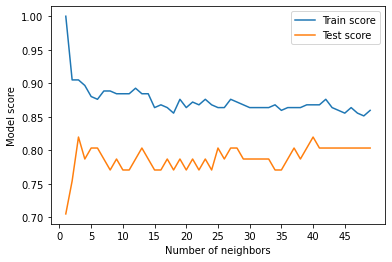

In [38]:
plt.plot(neighbors, train_scores_l, label="Train score")
plt.plot(neighbors, test_scores_l, label="Test score")
plt.xticks(np.arange(0, 50, 5))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores_l)*100:.2f}%");

In [39]:
# Find number of neighbors with the highest accuracy
n_trees = max_test_val

# Empty list to store the best number of neighbors
max_key = []
for key, val in test_scores.items(): 
    if val == n_trees:
        print(key)
        max_key.append(key)

3
40


In [40]:
# Scale X for cross-validation
X_scaled = sc.fit_transform(X)

In [41]:
# Take the best number of neighbors
best_num = int(max_key[1])

In [42]:
# Initiate KNN instance
knn_cv = KNeighborsClassifier(n_neighbors=best_num)

In [43]:
# Cross-validated accuracy
cv_knn = cross_val_score(knn_cv, 
                         X_scaled, 
                         y, 
                         cv=5, 
                         scoring='accuracy') 

In [44]:
cv_knn

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.85      ])

In [45]:
# Average of cross-validated scores
cv_knn.mean()

0.8382513661202184

In [46]:
# Standard deviation of cross-validated scores
cv_knn.std()

0.03518591073671226

In [47]:
# Setting up parameters for Randomized Search CV and Grid Search CV
KNN_params = {'n_neighbors': [3,40],
             'p': [1, 2, 5]}

In [48]:
# Perform Randomized Search on KNN model
rs_KNN = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                     param_distributions=KNN_params,
                     cv=5,
                     verbose=True,
                     n_iter=12)

rs_KNN.fit(X_train, y_train)

C:\Users\Farooq\Desktop\Shaikh\ML\My-Projects\venv-ml-1\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=12,
                   param_distributions={'n_neighbors': [3, 40], 'p': [1, 2, 5]},
                   verbose=True)

In [49]:
rs_KNN.best_params_

{'p': 2, 'n_neighbors': 40}

In [50]:
rs_KNN.score(X_train, y_train)

0.8677685950413223

In [51]:
rs_KNN.score(X_test, y_test)

0.819672131147541

In [52]:
# Final model
clf_knn = KNeighborsClassifier(n_neighbors=best_num)
clf_knn.fit(X_train, y_train)
# Model score on test data
clf_knn.score(X_test, y_test)

0.819672131147541

In [53]:
# Model score on train data
clf_knn.score(X_train, y_train)

0.8677685950413223

In [55]:
y_preds_knn = clf_knn.predict(X_test)

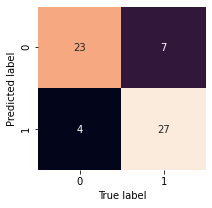

In [56]:
# Confusion matrix
knn_conf_mat = confusion_matrix(y_test, y_preds_knn)
plot_conf_matrix(knn_conf_mat)

In [57]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



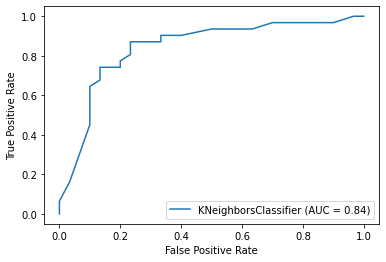

In [58]:
## Plot ROC curve and calculate AUC metric
plot_roc_curve(clf_knn, X_test, y_test);

### Model 2: Naive Bayes

P.S: I don't have sufficient knowledge of hyperparameter tuning for this particular model and so, I will skip it for now and implement the model maybe again in a future update.

### Model 3: Logistic Regression
Resources: https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression
* Solver (According to Scikit-Learn): For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

In [59]:
# Logistic Regression grid for hyperparameter tuning
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

In [60]:
# Perform RandomizedSearchCV on logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(random_state=7),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1082636733874054}

In [62]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [63]:
y_preds_rslg = rs_log_reg.predict(X_test)

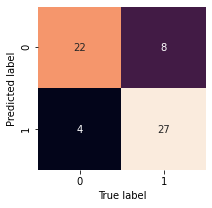

In [64]:
lg_conf_mat = confusion_matrix(y_test, y_preds_rslg)
plot_conf_matrix(lg_conf_mat)

In [65]:
# Perform GridSearchCV on logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(random_state=7),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=7),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [67]:
gs_log_reg.score(X_test, y_test)

0.8032786885245902

In [68]:
cv_log_reg = cross_val_score(LogisticRegression(C=0.1082636733874054,
                                               solver='liblinear'),
                            X_scaled,
                            y,
                            cv=5,
                            scoring='accuracy')

In [69]:
cv_log_reg

array([0.86885246, 0.8852459 , 0.80327869, 0.85      , 0.8       ])

In [70]:
cv_log_reg.mean()

0.8414754098360657

In [71]:
cv_log_reg.std() * 100

3.4401239954403215

In [72]:
# Final model
clf_log = LogisticRegression(C=0.1082636733874054,
                            solver='liblinear')

clf_log.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [73]:
clf_log.score(X_test, y_test)

0.8032786885245902

In [74]:
y_preds_clf_log = clf_log.predict(X_test)

In [75]:
print(classification_report(y_test, y_preds_clf_log))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



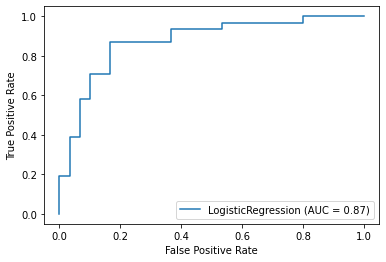

In [76]:
# Plot ROC Curve
plot_roc_curve(clf_log, X_test, y_test)

### Model 4: SVM Kernel

In [77]:
# GridSearch
svm_grid = {"C": np.logspace(-1, 2, 20),
            "gamma": np.logspace(-4, 2, 20)}

In [78]:
gs_svm = GridSearchCV(SVC(kernel='rbf', random_state=7),
                      param_grid=svm_grid,
                      cv=5,
                      verbose=True)

gs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   15.3s finished


GridSearchCV(cv=5, estimator=SVC(random_state=7),
             param_grid={'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ]),
                         'gamma': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])},
             verbose=True)

In [79]:
svm_params = gs_svm.best_params_

In [80]:
c_param = svm_params['C']
g_param = svm_params['gamma']

In [81]:
gs_svm.score(X_test, y_test)

0.8032786885245902

In [82]:
svm_cv = cross_val_score(SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param),
                         X_scaled,
                         y,
                         cv=5,
                         scoring='accuracy')

In [83]:
svm_cv.mean()

0.8413661202185793

In [84]:
svm_cv.std()

0.04344781217933294

In [85]:
# Final model
svm_clf = SVC(kernel='rbf', random_state=7, C=c_param, gamma=g_param)
svm_clf.fit(X_train, y_train)

SVC(C=0.20691380811147897, gamma=0.00379269019073225, random_state=7)

In [86]:
svm_preds = svm_clf.predict(X_test)

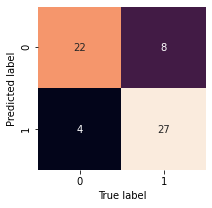

In [87]:
svm_conf_mat = confusion_matrix(y_test, svm_preds)
plot_conf_matrix(svm_conf_mat)

In [88]:
svm_clf.score(X_test, y_test)

0.8032786885245902

### Model 5: Random Forest

In [89]:
# Dictionary of number of trees with its accuracy score
tas = {}

for i in range(1, 2000, 100):
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_clf.fit(X_train_ws, y_train)
    tas.update({str(i): rf_clf.score(X_test_ws, y_test)})

In [90]:
max(tas.values())

0.8032786885245902

In [91]:
# Grid search for other parameters
rf_grid = {"max_depth": [5, 8, 15, 25, 30],
           "min_samples_split": [2, 5, 10, 15, 100],
           "min_samples_leaf": [2, 5, 10],
           "n_estimators": [100, 150, 200]} 

In [92]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

gs_rf.fit(X_train_ws, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  7.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [93]:
gs_rf.score(X_test_ws, y_test)

0.7704918032786885

In [94]:
rf_params = gs_rf.best_params_

In [95]:
rf_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 150}

In [96]:
rf_cv = cross_val_score(RandomForestClassifier(random_state=7, max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators= 150),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [97]:
rf_cv.mean()

0.8381967213114756

In [98]:
rf_cv.std() * 100

4.849073303161097

In [99]:
# Default model cross-validation
rf_cv2 = cross_val_score(RandomForestClassifier(random_state=7),
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

In [100]:
rf_cv2.mean()

0.8414754098360657

In [101]:
rf_cv2.std() * 100

3.7395738784332275

In [102]:
# Final model
rf_clf = RandomForestClassifier(random_state=7, n_estimators=100)
rf_clf.fit(X_train_ws, y_train)

RandomForestClassifier(random_state=7)

In [103]:
rf_clf.score(X_test_ws, y_test)

0.8032786885245902

In [104]:
rf_clf.score(X_train_ws, y_train)

1.0

In [105]:
rf_y_preds = rf_clf.predict(X_test_ws)

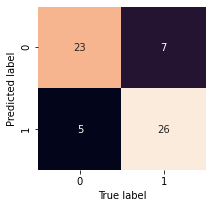

In [107]:
rf_conf_mat = confusion_matrix(y_test, rf_y_preds)
plot_conf_matrix(rf_conf_mat)

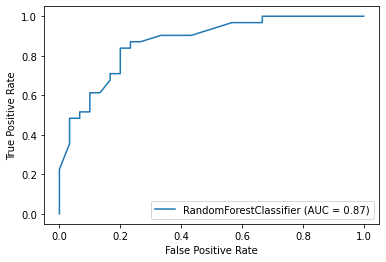

In [108]:
plot_roc_curve(rf_clf, X_test, y_test);

In [109]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [110]:
# Final scores with hyperparameter tuning
f_scores = {"Cat Boost:": cb_clf.score(X_test_mms, y_test),
            "KNN:": rs_KNN.score(X_test, y_test) ,
            "Logistic Regression:": rs_log_reg.score(X_test, y_test),
            "SVM Kernel:": gs_svm.score(X_test, y_test),
            "Random Forest:": rf_clf.score(X_test_ws, y_test)} 

In [119]:
for i in f_scores:
    print(i, f_scores[i])

Cat Boost: 0.8032786885245902
KNN: 0.819672131147541
Logistic Regression: 0.8032786885245902
SVM Kernel: 0.8032786885245902
Random Forest: 0.8032786885245902
